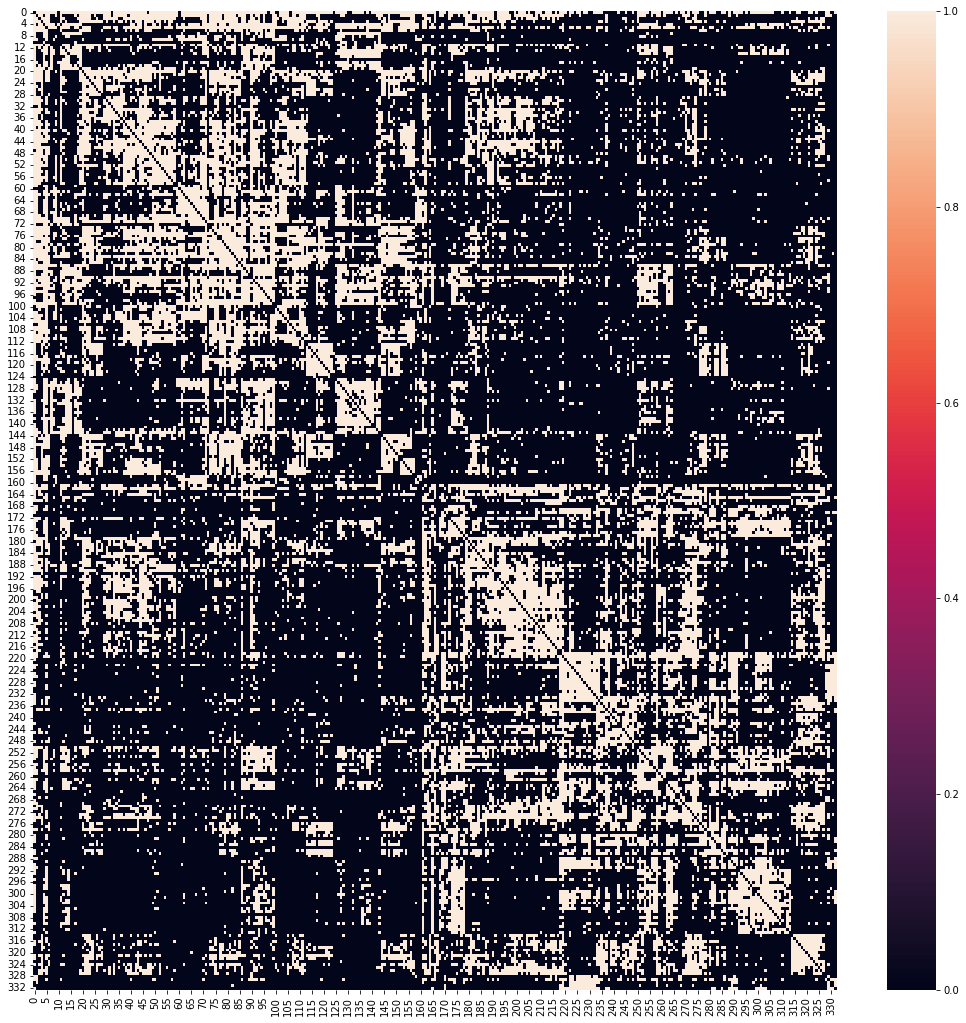

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 18))

df = pd.read_csv('data/sub-CON01_ses-preop.csv',header=None)
df = (df > 0).astype(int)
fig = sns.heatmap(df
                  )

In [2]:
#initialise the time series
x, y = [], []
x.append(0.1)
y.append(0.2)
for i in range(1, 13):
    xi = x[i-1]*(3.78-3.78*x[i-1])
    yi = y[i-1]*(3.77-3.77*y[i-1])
    x.append(xi)
    y.append(yi)

for i in range(13, 20001):
	xi = x[i-1]*(3.78-3.78*x[i-1])
	yi = y[i-1]*(3.77-3.77*y[i-1]-0.8*x[i-1-10])
	x.append(xi)
	y.append(yi)

In [3]:
time_series_df = pd.DataFrame(columns=['t', 'x', 'y'])
time_series_df['t'] = range(0, 20001)
time_series_df['x'] = x
time_series_df['y'] = y


In [4]:
time_series_df

,t,x,y
0,0,0.100000,0.200000
1,1,0.340200,0.603200
2,2,0.848474,0.902349
3,3,0.485980,0.332196
4,4,0.944257,0.836343
...,...,...,...
19996,19996,0.829179,0.587609
19997,19997,0.535404,0.692061
19998,19998,0.940262,0.281972
19999,19999,0.212320,0.716598


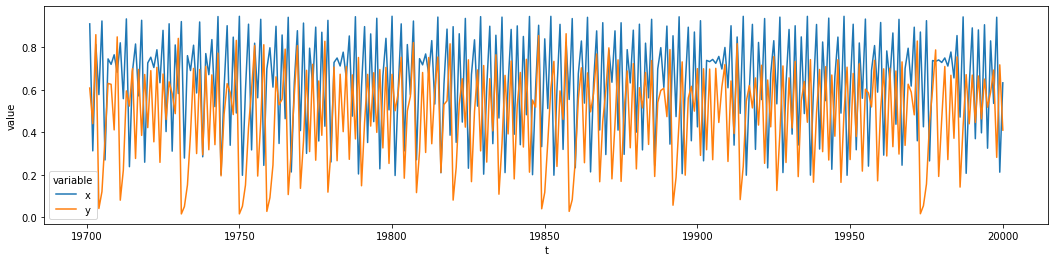

In [5]:
fig, ax = plt.subplots(figsize=(18, 4))

time_series_df_melted = pd.melt(time_series_df.tail(300), id_vars= 't', value_vars=['x', 'y'])
fig = sns.lineplot(data=time_series_df_melted,
                   x = 't',
                   y = 'value',
                   hue = 'variable'
                   )

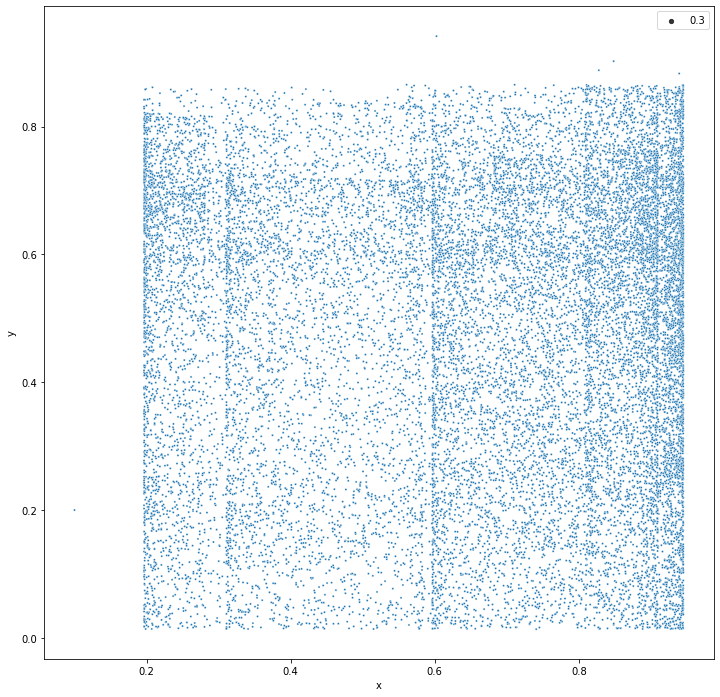

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))

fig = sns.scatterplot(data=time_series_df,
                      x = 'x',
                      y = 'y',
                      marker = '.',
                      size = .3
                      )

In [7]:
# from sklearn.model_selection import train_test_split
from pyrcn.echo_state_network import ESNRegressor

In [8]:
X_train = np.array(x[:15000]).reshape(-1, 1)
y_train = np.array(y[:15000])

X_test = np.array(x[15000:]).reshape(-1, 1)
y_test = np.array(y[15000:])

In [9]:
reg = ESNRegressor()

In [10]:

reg.fit(X=X_train, y=y_train)

y_pred = reg.predict(X_test)

In [11]:
y_pred

array([-46.7206521 ,  45.74401214,  -8.10379213, ...,   0.26571271,
         0.62044618,   0.48453732])

In [34]:
out_df = pd.DataFrame(columns=['y_test', 'y_pred'])
out_df['y_test'] = y_test[20:]
out_df['y_pred'] = y_pred[20:]

In [32]:
out_df

,y_test,y_pred
0,0.553092,-1.367049
1,0.546259,1.143507
2,0.749438,-0.014471
3,0.154683,0.532932
4,0.459617,0.602637
...,...,...
4986,0.587609,0.420732
4987,0.692061,0.762940
4988,0.281972,0.265713
4989,0.716598,0.620446


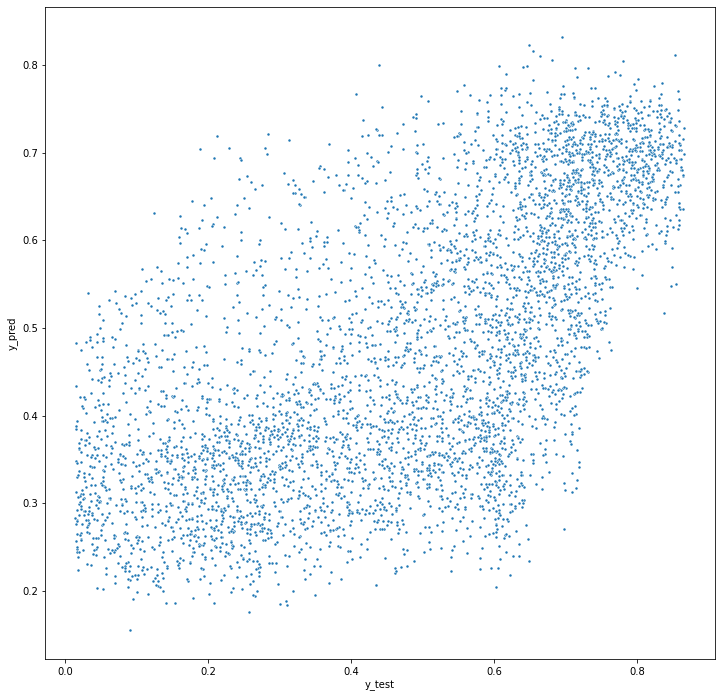

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))

fig = sns.scatterplot(data = out_df,
                      x = 'y_test',
                      y = 'y_pred',
                      marker = '.'
                      )

In [36]:
np.corrcoef(y_test[20:], y_pred[20:])

array([[1.      , 0.655138],
       [0.655138, 1.      ]])

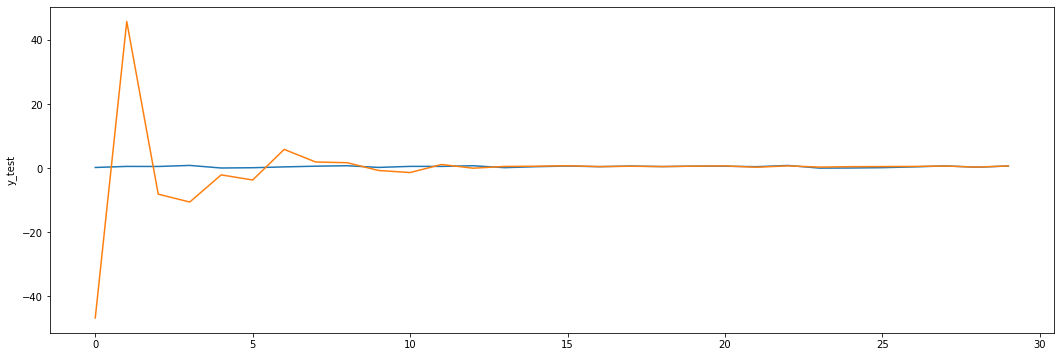

In [45]:
out_df2 = pd.DataFrame(columns=['y_test', 'y_pred'])
out_df2['y_test'] = y_test
out_df2['y_pred'] = y_pred

fig, ax = plt.subplots(figsize=(18, 6))

fig = sns.lineplot(data = out_df2['y_test'][:30])
fig = sns.lineplot(data = out_df2['y_pred'][:30])

#ax.set_ylim(-2,2)

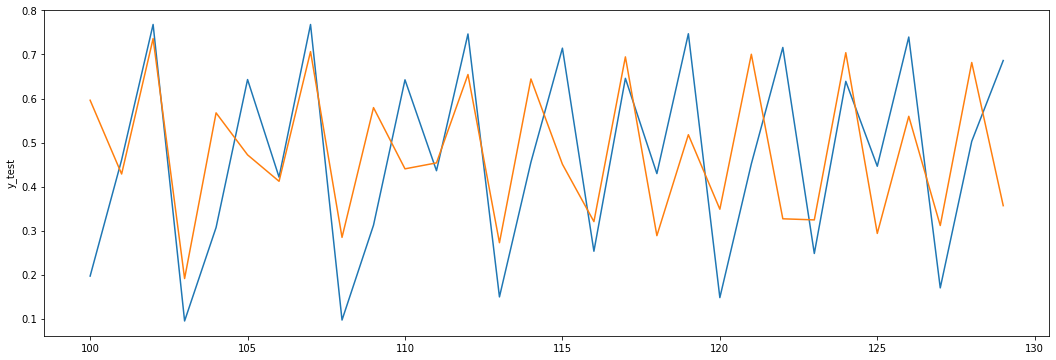

In [49]:
out_df2 = pd.DataFrame(columns=['y_test', 'y_pred'])
out_df2['y_test'] = y_test
out_df2['y_pred'] = y_pred

fig, ax = plt.subplots(figsize=(18, 6))

fig = sns.lineplot(data = out_df2['y_test'][100:130])
fig = sns.lineplot(data = out_df2['y_pred'][100:130])

#ax.set_ylim(-2,2)